In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from tqdm import tqdm

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
from sklearn.metrics import classification_report

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
df = pd.read_csv("Student_performance_data _.csv")

In [10]:
print(df)

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracur

In [11]:
print(df[0:4])

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3.042915         1.0  
2             0  0.112602         4.0  
3             0  2.054218         3.0  


In [12]:
print(df.iloc[0:4,0:2])

   StudentID  Age
0       1001   17
1       1002   18
2       1003   15
3       1004   17


In [13]:
X = df.drop(columns = ["StudentID","GradeClass"])

In [14]:
y = df["GradeClass"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
model = RandomForestClassifier(n_estimators = 200, warm_start=True, random_state =42)

In [17]:
for i in tqdm(range(1,201), desc="Training Random Forest"):
    model.n_estimators = i
    model.fit(X_train, y_train)

Training Random Forest: 100%|███████████| 200/200 [00:01<00:00, 102.09it/s]


In [18]:
y_pred = model.predict(X_test)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9144050104384134


In [20]:
print("Classification Repot: \n", classification_report(y_test, y_pred))

Classification Repot: 
               precision    recall  f1-score   support

         0.0       0.83      0.45      0.59        22
         1.0       0.81      0.88      0.84        49
         2.0       0.94      0.87      0.90        85
         3.0       0.90      0.90      0.90        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.84       479
weighted avg       0.91      0.91      0.91       479



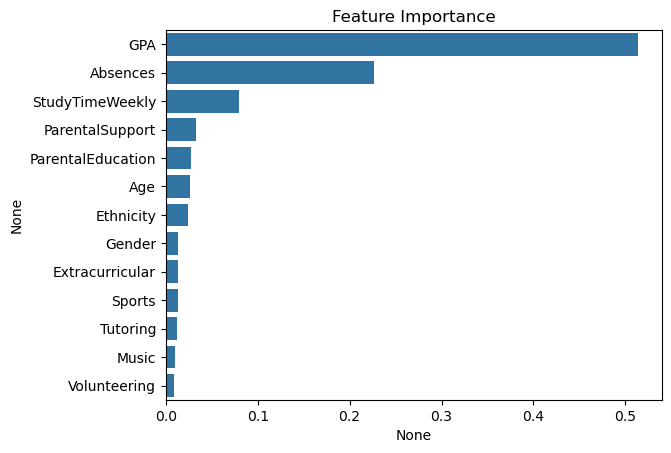

In [21]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances, y = feature_importances.index)
plt.title("Feature Importance")
plt.show()